# TEM Image Processing Pipeline

In this notebook we implement an image processing pipeline to extract information from transmission electron microscopy images of barium titanate nanoparticles in a low density polyethylene _matrix_. Information gained from this process includes the:
- number of particles, $N_p$
- number of agglomerates, $N_a$
- size of particles (longest and shortest chord lengths)
- locations of particles (x,y)
- number of particles per agglomerate, $n$
- factor of agglomeration

where factor of agglomeration is given by:
$$F_a = \frac{N_a \cdot n}{N_p}$$

#### Steps:

Load Input: We don't need to process input image with 3 color channels as TEM images tend to be grayscale. Each pixel is 8 bits ranging from 0 (light) to 255 (dark).

Gaussian Blur: TEM images have noise (looks like a fine grain filter accross image). To smooth out these grains we apply a gaussian blur.
TODO: explain kernel matrix

Binary Threshold: Convert grayscale pixels to only take on values of 0 (light) or 1 (dark). This helps us reduce image size for faster processing but also results in a significant loss of information from the original image.
TODO: explain OTSU's method

## 1. Import necessary libraries and setup

In [1]:
import cv2 as cv                   # OpenCV for image processing
import matplotlib.pyplot as plt    # Matplotlib for visualizing
import numpy as np                 # NumPy for quick maths
from collections import Counter    # dictionary quick maths
from tem_functions import *        # import necessary functions from separate python file
import time                        # timing how long it takes to import libraries

t_pipe_init = time.perf_counter()  # begin timing pipeline

Define constants

In [2]:
threshold_1 = 55 # for 36a
threshold_2 = 35 # for 36b
threshold_3 = 45 # for 36e

print(str(nm_per_pixel), "nm per pixel")
print(str(expected_radius), "nm is the expected particle radius")

0.8849557522123894 nm per pixel


## 2. Load input data and apply grayscale

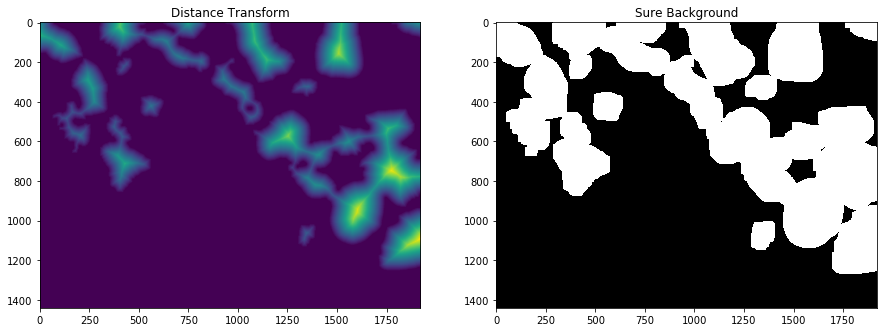

In [3]:
# display images inline in notebook, comment can't be on same line (glitch)
%matplotlib inline 

IMAGE_NAME_1 = "TES-36a-cropped.tif"
IMAGE_NAME_2 = "TES-36b-cropped.tif"
IMAGE_NAME_3 = "TES-36e-cropped.tif"

color_image_1, dist_transform_1, sure_bg_1 = setup(IMAGE_NAME_1, threshold_1, False)
# color_image_2, dist_transform_2, sure_bg_2 = setup(IMAGE_NAME_2, threshold_2, False)
# color_image_3, dist_transform_3, sure_bg_3 = setup(IMAGE_NAME_3, threshold_3, False)

## 3. Contours derived from sure background & foreground

### Contour particles 

Threshold distance transform with a higher value to get particle centers for watershed algorithm

## 4. Contours derived from Watershed algorithm

Markers pt.2 except this time they're derived from watershed instead of background - foreground

Run watershed algorithm from particle centers

First obtain contour pixels and get their colors

## 5. Find area of particles
 to see if it is worth it to run watershed on the current threshold

In [4]:
dist_transform_thresh_1 = get_watershed_threshold(dist_transform_1, sure_bg_1, color_image_1, expected_radius)
# dist_transform_thresh_2 = get_watershed_threshold(dist_transform_2, sure_bg_2, color_image_2, expected_radius)
# dist_transform_thresh_3 = get_watershed_threshold(dist_transform_3, sure_bg_3, color_image_3, expected_radius)
#print(dist_transform_thresh)

In [5]:
# watershed markers for finding particles (no agglomerates)
watershed_markers_1 = get_watershed_markers(dist_transform_1, dist_transform_thresh_1, sure_bg_1, color_image_1, False)
# watershed_markers_2 = get_watershed_markers(dist_transform_2, dist_transform_thresh_2, sure_bg_2, color_image_2, False)
# watershed_markers_3 = get_watershed_markers(dist_transform_3, dist_transform_thresh_3, sure_bg_3, color_image_3, False)

# watershed markers for finding agglomerates
agg_watershed_markers_1 = get_watershed_markers(dist_transform_1, 0.1, sure_bg_1, color_image_1, False)
# agg_watershed_markers_2 = get_watershed_markers(dist_transform_2, 0.1, sure_bg_2, color_image_2, False)
# agg_watershed_markers_3 = get_watershed_markers(dist_transform_3, 0.1, sure_bg_3, color_image_3, False)

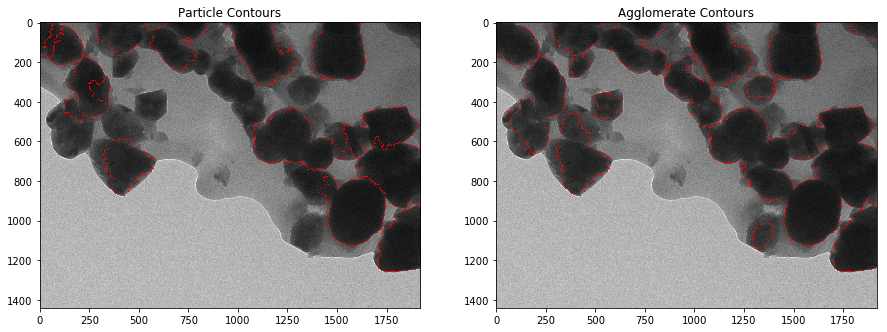

In [6]:
contour_colors_1, chords_color_copy_1 = get_contour_colors(watershed_markers_1, color_image_1)
# contour_colors_2, chords_color_copy_2 = get_contour_colors(watershed_markers_2, color_image_2)
# contour_colors_3, chords_color_copy_3 = get_contour_colors(watershed_markers_3, color_image_3)

agg_contour_colors_1, agg_chords_color_copy_1 = get_contour_colors(agg_watershed_markers_1, color_image_1)
# agg_contour_colors_2, agg_chords_color_copy_2 = get_contour_colors(agg_watershed_markers_2, color_image_2)
# agg_contour_colors_3, agg_chords_color_copy_3 = get_contour_colors(agg_watershed_markers_3, color_image_3)

display_images([chords_color_copy_1, agg_chords_color_copy_1], ["Particle Contours", "Agglomerate Contours"], [1, 1])
# display_images([chords_color_copy_2, agg_chords_color_copy_2], ["Particle Contours", "Agglomerate Contours"], [1, 1])
# display_images([chords_color_copy_3, agg_chords_color_copy_3], ["Particle Contours", "Agglomerate Contours"], [1, 1])

In [7]:
particles_1 = find_centerpoints(contour_colors_1)
# particles_2 = find_centerpoints(contour_colors_2)
# particles_3 = find_centerpoints(contour_colors_3)

agg_particles_1 = find_centerpoints(agg_contour_colors_1)
# agg_particles_2 = find_centerpoints(agg_contour_colors_2)
# agg_particles_3 = find_centerpoints(agg_contour_colors_3)

In [8]:
particle_areas_1 = get_areas(watershed_markers_1)
# particle_areas_2 = get_areas(watershed_markers_2)
# particle_areas_3 = get_areas(watershed_markers_3)

agg_areas_1 = get_areas(agg_watershed_markers_1)
# agg_areas_2 = get_areas(agg_watershed_markers_2)
# agg_areas_3 = get_areas(agg_watershed_markers_3)

In [9]:
# TODO: standardize way of referring to unique particle ID, here particle == color
# TODO: make v2 of function that defines agglomerate area by contour not min/max rectangle

merge_particles_1, merge_contour_colors_1 = match_images(particles_1, contour_colors_1, agg_particles_1, agg_contour_colors_1, agg_areas_1)
# merge_particles_2, merge_contour_colors_2 = match_images(particles_2, contour_colors_2, agg_particles_2, agg_contour_colors_2, agg_areas_2)
# merge_particles_3, merge_contour_colors_3 = match_images(particles_3, contour_colors_3, agg_particles_3, agg_contour_colors_3, agg_areas_3)
# [print(x, merge_particles[x]) for x in merge_particles.keys()]

In [10]:
long_pairs_1, merge_particles_1 = get_long_chord_lengths(merge_particles_1, merge_contour_colors_1)
# long_pairs_2, merge_particles_2 = get_long_chord_lengths(merge_particles_2, merge_contour_colors_2)
# long_pairs_3, merge_particles_3 = get_long_chord_lengths(merge_particles_3, merge_contour_colors_3)

# print(long_pairs)

In [11]:
short_pairs_1, merge_particles_1 = get_short_chord_lengths(merge_particles_1, merge_contour_colors_1, long_pairs_1)
# short_pairs_2, merge_particles_2 = get_short_chord_lengths(merge_particles_2, merge_contour_colors_2, long_pairs_2)
# short_pairs_3, merge_particles_3 = get_short_chord_lengths(merge_particles_3, merge_contour_colors_3, long_pairs_3)

print(merge_particles_1)

{2: [('x', 87.49943038378461), ('y', 106.50273871476355), ('a', 123.96726646383247), ('theta', -139.48743277847583), ('b', 80.71189440828456)], 3: [('x', 513.072440640263), ('y', 95.88169157115915), ('a', 271.15050024260574), ('theta', -157.95551896792676), ('b', 55.41582745190671)], 4: [('x', 982.3306783109031), ('y', 136.6318612002067), ('a', 190.05854150044047), ('theta', -150.27166383095857), ('b', 109.84240342749035)], 5: [('x', 1308.1000479831878), ('y', 135.67944801112725), ('a', 155.7974592363028), ('theta', -50.0694201326125), ('b', 134.8512579645084)], 6: [('x', 1634.3179951335183), ('y', 32.96653906358973), ('a', 76.34506657937679), ('theta', -149.71965971749324)], 7: [('x', 364.45380756439886), ('y', 191.7070627360352), ('a', 60.18349782626302), ('theta', -70.23283132320836)], 9: [('x', 170.2333978683352), ('y', 376.9626791181259), ('a', 222.86350439881437), ('theta', -85.33082776944293), ('b', 100.03229958437342)], 8: [('x', 873.3272361127214), ('y', 301.4242592091647), ('

In [12]:
# draw_long_lengths(chords_color_copy, long_pairs)
# draw_short_lengths(chords_color_copy, short_pairs)
# display_images([chords_color_copy], ["Long & Short Chord Lengths"], [0])
# plt.savefig("chords_color_copy_long_short_chord_lengths.png", dpi=500)

# draw_long_lengths(chords_color_copy_1, long_pairs_1)
# draw_long_lengths(chords_color_copy_2, long_pairs_2)
# draw_long_lengths(chords_color_copy_3, long_pairs_3)

# draw_short_lengths(chords_color_copy_1, short_pairs_1)
# draw_short_lengths(chords_color_copy_2, short_pairs_2)
# draw_short_lengths(chords_color_copy_3, short_pairs_3)

# draw_long_lengths(agg_chords_color_copy, long_pairs)
# draw_short_lengths(agg_chords_color_copy, short_pairs)
# display_images([agg_chords_color_copy], ["Agg Long & Short Chord Lengths"], [0])
# plt.savefig("agg_chords_color_copy_long_short_chord_lengths.png", dpi=500)

In [13]:
# display_images([chords_color_copy_1], ["Long & Short Chord Lengths Layer a"], [0])
# display_images([chords_color_copy_2], ["Long & Short Chord Lengths Layer b"], [0])
# display_images([chords_color_copy_3], ["Long & Short Chord Lengths Layer e"], [0])

# plt.savefig("long_short_chord_lengths_a.png", dpi=500)

In [14]:
merge_particles_1 = get_c(merge_particles_1)
# merge_particles_2 = get_c(merge_particles_2)
# merge_particles_3 = get_c(merge_particles_3)

print(merge_particles_1)

{2: [('x', 87.49943038378461), ('y', 106.50273871476355), ('a', 123.96726646383247), ('theta', -139.48743277847583), ('b', 80.71189440828456), ('c', 102.33958043605853)], 3: [('x', 513.072440640263), ('y', 95.88169157115915), ('a', 271.15050024260574), ('theta', -157.95551896792676), ('b', 55.41582745190671), ('c', 163.28316384725622)], 4: [('x', 982.3306783109031), ('y', 136.6318612002067), ('a', 190.05854150044047), ('theta', -150.27166383095857), ('b', 109.84240342749035), ('c', 149.9504724639654)], 5: [('x', 1308.1000479831878), ('y', 135.67944801112725), ('a', 155.7974592363028), ('theta', -50.0694201326125), ('b', 134.8512579645084), ('c', 145.32435860040562)], 6: [('x', 1634.3179951335183), ('y', 32.96653906358973), ('a', 76.34506657937679), ('theta', -149.71965971749324)], 7: [('x', 364.45380756439886), ('y', 191.7070627360352), ('a', 60.18349782626302), ('theta', -70.23283132320836)], 9: [('x', 170.2333978683352), ('y', 376.9626791181259), ('a', 222.86350439881437), ('theta', 

In [15]:
info_1 = get_layer_info(merge_particles_1)
# info_2 = get_layer_info(merge_particles_2)
# info_3 = get_layer_info(merge_particles_3)

print(info_1)
# print(info_2)
# print(info_3)

[1817.9594305919986, 1310.7750080872388, -52.63010653047917, -175.2688086714466, 163.28316384725622, 132812858.84470013, 0.17066968345065064]


In [16]:
# combine_layers([merge_particles_1,merge_particles_2,merge_particles_3], [info_1, info_2, info_3], "max_c_abe.txt")
# combine_layers([merge_particles_1,merge_particles_3,merge_particles_2], [info_1, info_3, info_2], "max_c_aeb.txt")
# combine_layers([merge_particles_2,merge_particles_1,merge_particles_3], [info_2, info_1, info_3], "max_c_bae.txt")
# combine_layers([merge_particles_2,merge_particles_3,merge_particles_1], [info_2, info_3, info_1], "max_c_bea.txt")
# combine_layers([merge_particles_3,merge_particles_1,merge_particles_2], [info_3, info_1, info_2], "max_c_eab.txt")
# combine_layers([merge_particles_3,merge_particles_2,merge_particles_1], [info_3, info_2, info_1], "max_c_eba.txt")



In [17]:
t_pipe_final = time.perf_counter()

print("time to run pipeline:", str(t_pipe_final - t_pipe_init), "seconds")

time to run pipeline: 214.070856170998 seconds


In [18]:
print(merge_particles_1)

{2: [('x', 87.49943038378461), ('y', 106.50273871476355), ('a', 123.96726646383247), ('theta', -139.48743277847583), ('b', 80.71189440828456), ('c', 102.33958043605853)], 3: [('x', 513.072440640263), ('y', 95.88169157115915), ('a', 271.15050024260574), ('theta', -157.95551896792676), ('b', 55.41582745190671), ('c', 163.28316384725622)], 4: [('x', 982.3306783109031), ('y', 136.6318612002067), ('a', 190.05854150044047), ('theta', -150.27166383095857), ('b', 109.84240342749035), ('c', 149.9504724639654)], 5: [('x', 1308.1000479831878), ('y', 135.67944801112725), ('a', 155.7974592363028), ('theta', -50.0694201326125), ('b', 134.8512579645084), ('c', 145.32435860040562)], 6: [('x', 1634.3179951335183), ('y', 32.96653906358973), ('a', 76.34506657937679), ('theta', -149.71965971749324)], 7: [('x', 364.45380756439886), ('y', 191.7070627360352), ('a', 60.18349782626302), ('theta', -70.23283132320836)], 9: [('x', 170.2333978683352), ('y', 376.9626791181259), ('a', 222.86350439881437), ('theta', 

In [19]:
#combine_layers([merge_particles_2,merge_particles_3], [info_2, info_3], "two_layer_be.txt")

In [20]:
combine_layers([merge_particles_1], [info_1], "layer_a.txt")
#combine_layers([merge_particles_2], [info_2], "layer_b.txt")
#combine_layers([merge_particles_3], [info_3], "layer_e.txt")
